<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/clustering_model_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet gdown

import gdown
url = 'https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK'
output = 'klasifikasi_dataset.csv'
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=5f693cda-1a85-46c7-a377-3adb77ecb8f7
To: /content/klasifikasi_dataset.csv
100%|██████████| 443M/443M [00:06<00:00, 68.7MB/s]


'klasifikasi_dataset.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Membaca dataset
df = pd.read_csv('klasifikasi_dataset.csv')

# Tampilkan 5 baris pertama
print("5 baris pertama:")
display(df.head())

# Informasi umum
print("\nInformasi dataset:")
print(df.info())

# Cek missing values
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Statistik deskriptif
print("\nStatistik deskriptif:")
display(df.describe())



5 baris pertama:


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-n

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630



Menggunakan kolom '2.26327' sebagai target


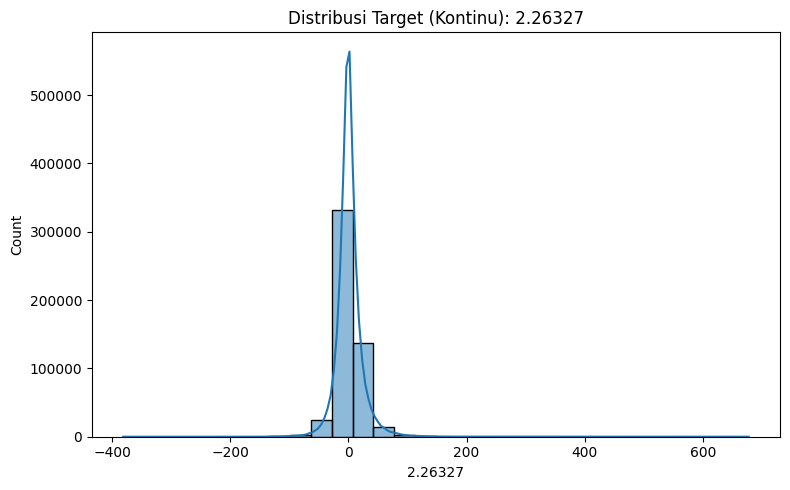

In [5]:
numerik = df.select_dtypes(include=['int64', 'float64'])
target_column = numerik.columns[-1]
print(f"\nMenggunakan kolom '{target_column}' sebagai target")

n_unique = df[target_column].nunique()
plt.figure(figsize=(8, 5))
if n_unique <= 20:
    sns.countplot(data=df, x=target_column)
    plt.title(f'Distribusi Target (Kategori): {target_column}')
else:
    sns.histplot(df[target_column], bins=30, kde=True)
    plt.title(f'Distribusi Target (Kontinu): {target_column}')
plt.tight_layout()
plt.show()

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")


Jumlah fitur: 90
Jumlah sampel: 515344


Low variance features (threshold=0.01): []
Dataset shape after removing low variance features: (515344, 91)
Duplicate groups found: []
Will drop: []


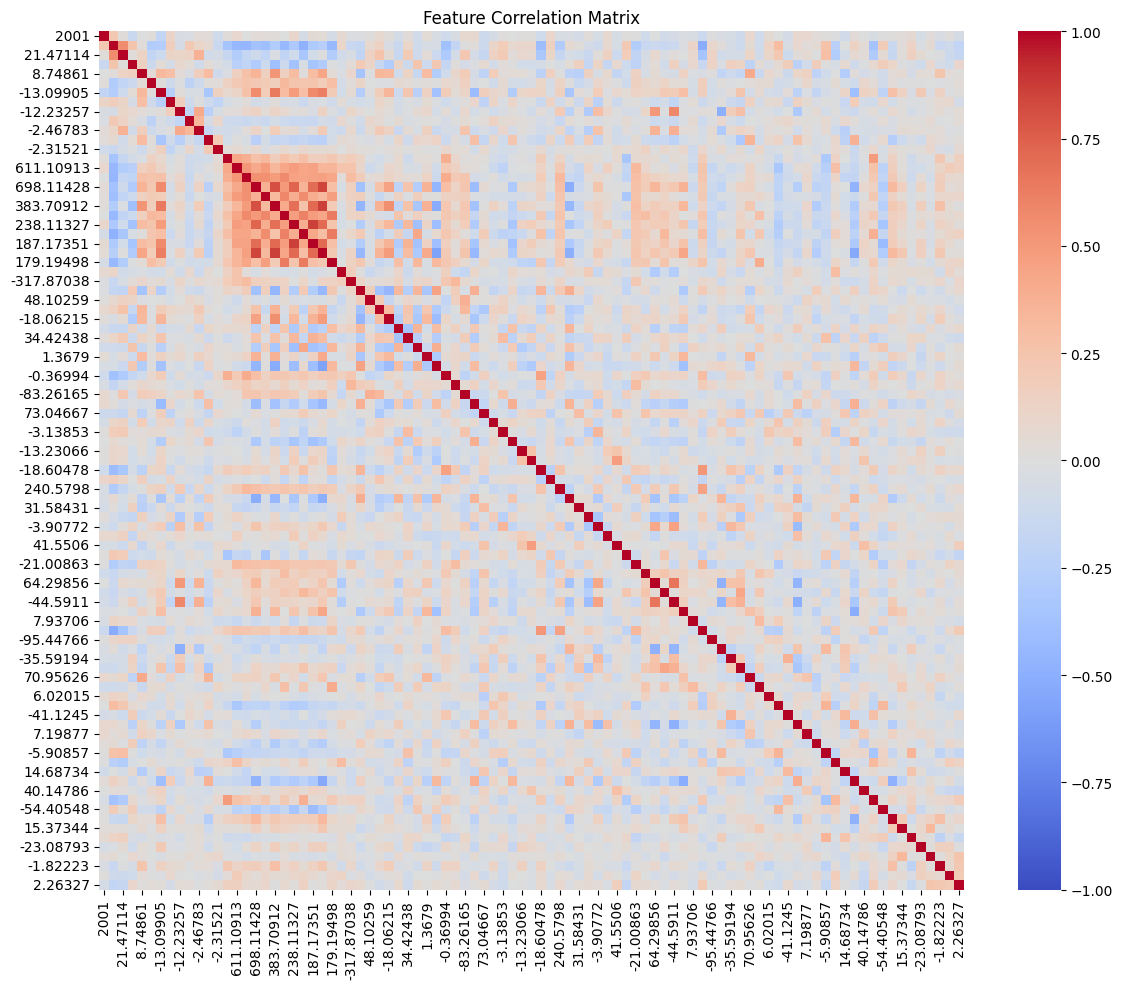


Highly correlated feature pairs (|r| > 0.80):
383.70912 and 698.11428: r = 0.810
187.17351 and 238.11327: r = 0.866
100.42652 and 698.11428: r = 0.847
100.42652 and 383.70912: r = 0.860

Features dropped due to high correlation: ['698.11428', '383.70912', '187.17351']
Dataset shape after correlation-based feature selection: (515344, 88)

Feature Selection Summary:
- Original number of features: 91
- Low variance features removed: 0
- Duplicate features removed: 0
- Highly correlated features removed: 3
- Final number of features: 88


In [10]:
# Feature Selection

# 1. Hapus fitur konstan atau hampir konstan (low variance)
def remove_low_variance_features(df, numeric_columns, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df[numeric_columns])
    constant_features = [numeric_columns[i] for i in range(len(numeric_columns)) if not selector.get_support()[i]]
    print(f"Low variance features (threshold={threshold}):", constant_features)
    if constant_features:
        df_filtered = df.drop(columns=constant_features)
        return df_filtered, constant_features
    return df, []

# Define numeric_cols before calling the function
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns # Define numeric_cols here

df_filtered, removed_features = remove_low_variance_features(df, numeric_cols)
print(f"Dataset shape after removing low variance features: {df_filtered.shape}")


# 2. Deteksi dan hapus kolom duplikat
def find_duplicate_columns(df):
    col_hashes = {}
    for col in df.columns:
        fingerprint = int(pd.util.hash_pandas_object(df[col], index=False).sum())
        col_hashes.setdefault(fingerprint, []).append(col)

    duplicate_groups = []
    for bucket in col_hashes.values():
        if len(bucket) > 1:
            verified = []
            used = set()
            for i, col_i in enumerate(bucket):
                if col_i in used:
                    continue
                group = [col_i]
                for col_j in bucket[i+1:]:
                    if col_j in used:
                        continue
                    if np.array_equal(df[col_i].values, df[col_j].values):
                        group.append(col_j)
                        used.add(col_j)
                if len(group) > 1:
                    verified.append(tuple(group))
            duplicate_groups.extend(verified)

    return duplicate_groups

duplicate_groups = find_duplicate_columns(df_filtered)
print("Duplicate groups found:", duplicate_groups)
duplicate_columns = [dup for group in duplicate_groups for dup in group[1:]]
print("Will drop:", duplicate_columns)
if duplicate_columns:
    df_filtered = df_filtered.drop(columns=duplicate_columns)
    print(f"Dataset shape after removing duplicate features: {df_filtered.shape}")

# 3. Korelasi antar fitur
correlation_matrix = df_filtered.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

def identify_correlated_features(correlation_matrix, threshold=0.80):
    correlated_features = []
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    for col in upper_tri.columns:
        high_corr = upper_tri[col][abs(upper_tri[col]) > threshold].index.tolist()
        for feature in high_corr:
            correlated_features.append((col, feature, correlation_matrix.loc[col, feature]))
    return correlated_features

correlated_features = identify_correlated_features(correlation_matrix, threshold=0.80)
print("\nHighly correlated feature pairs (|r| > 0.80):")
for feat1, feat2, corr in correlated_features:
    print(f"{feat1} and {feat2}: r = {corr:.3f}")

def select_features_from_correlated_pairs(df, correlated_features):
    if not correlated_features:
        return df, []
    all_correlated_features = set()
    for feat1, feat2, _ in correlated_features:
        all_correlated_features.add(feat1)
        all_correlated_features.add(feat2)

    corr_matrix = df[list(all_correlated_features)].corr()
    mean_abs_corr = {feature: corr_matrix[feature].abs().mean() for feature in all_correlated_features}

    features_to_drop = set()
    for feat1, feat2, _ in correlated_features:
        if mean_abs_corr[feat1] > mean_abs_corr[feat2]:
            features_to_drop.add(feat2)
        else:
            features_to_drop.add(feat1)

    if features_to_drop:
        df_selected = df.drop(columns=list(features_to_drop))
        return df_selected, list(features_to_drop)
    return df, []

df_selected, dropped_correlated = select_features_from_correlated_pairs(df_filtered, correlated_features)
print(f"\nFeatures dropped due to high correlation: {dropped_correlated}")
print(f"Dataset shape after correlation-based feature selection: {df_selected.shape}")

print("\nFeature Selection Summary:")
print(f"- Original number of features: {df.shape[1]}")
print(f"- Low variance features removed: {len(removed_features)}")
print(f"- Duplicate features removed: {len(duplicate_columns)}")
print(f"- Highly correlated features removed: {len(dropped_correlated)}")
print(f"- Final number of features: {df_selected.shape[1]}")

numeric_columns = df_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()



Skewness of numeric features:
64.29856     4.509804
1.3679       4.233735
179.19498    4.171219
251.42414    3.282871
100.42652    3.139361
               ...   
-10.29407   -2.383997
-37.29765   -2.454587
-24.21531   -3.272463
-8.40816    -3.477560
-54.32125   -4.338764
Length: 88, dtype: float64


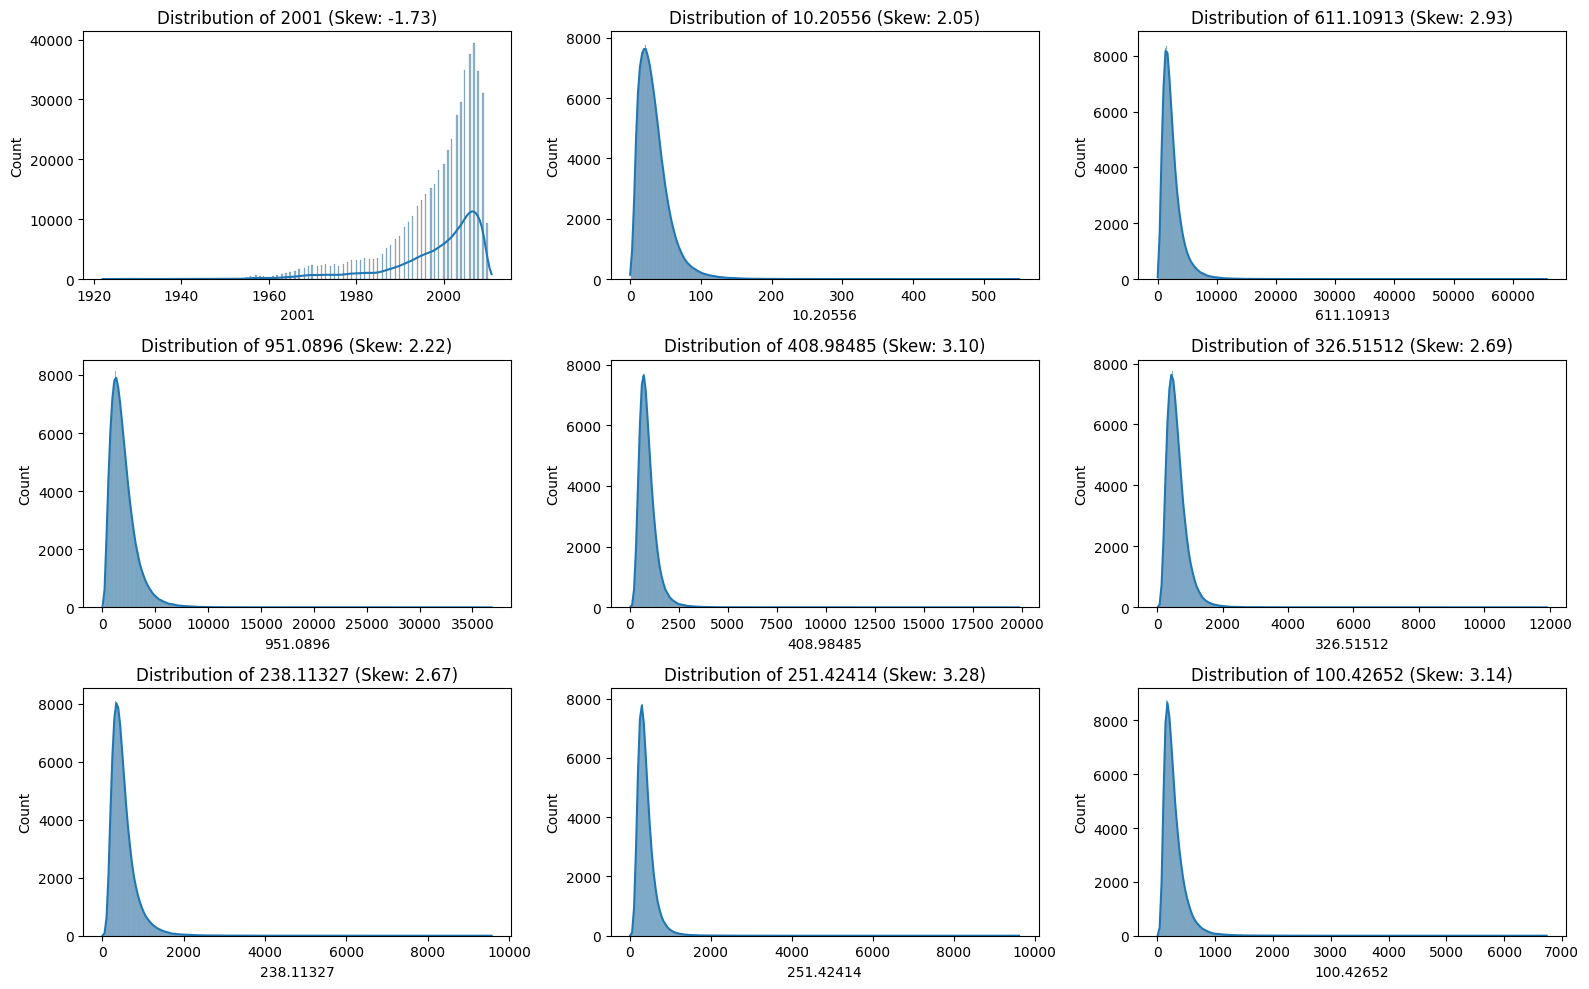


Transformed features:
- 2001 -> 2001_squared
- 10.20556 -> 10.20556_log
- 611.10913 -> 611.10913_log
- 951.0896 -> 951.0896_log
- 408.98485 -> 408.98485_log
- 326.51512 -> 326.51512_log
- 238.11327 -> 238.11327_log
- 251.42414 -> 251.42414_log
- 100.42652 -> 100.42652_log
- 179.19498 -> 179.19498_log
- -317.87038 -> -317.87038_log
- -18.06215 -> -18.06215_log
- 11.7267 -> 11.7267_log
- 1.3679 -> 1.3679_log
- -0.36994 -> -0.36994_log
- -133.67852 -> -133.67852_log
- -37.29765 -> -37.29765_squared
- -3.13853 -> -3.13853_squared
- -24.21531 -> -24.21531_squared
- 82.15479 -> 82.15479_squared
- 240.5798 -> 240.5798_log
- -10.29407 -> -10.29407_squared
- -3.90772 -> -3.90772_log
- -7.26272 -> -7.26272_squared
- -21.00863 -> -21.00863_log
- 105.50848 -> 105.50848_log
- 64.29856 -> 64.29856_log
- 26.08481 -> 26.08481_log
- -44.5911 -> -44.5911_log
- -8.30657 -> -8.30657_log
- -82.03307 -> -82.03307_squared
- 70.95626 -> 70.95626_log
- 28.09139 -> 28.09139_log
- -37.13767 -> -37.13767_squared

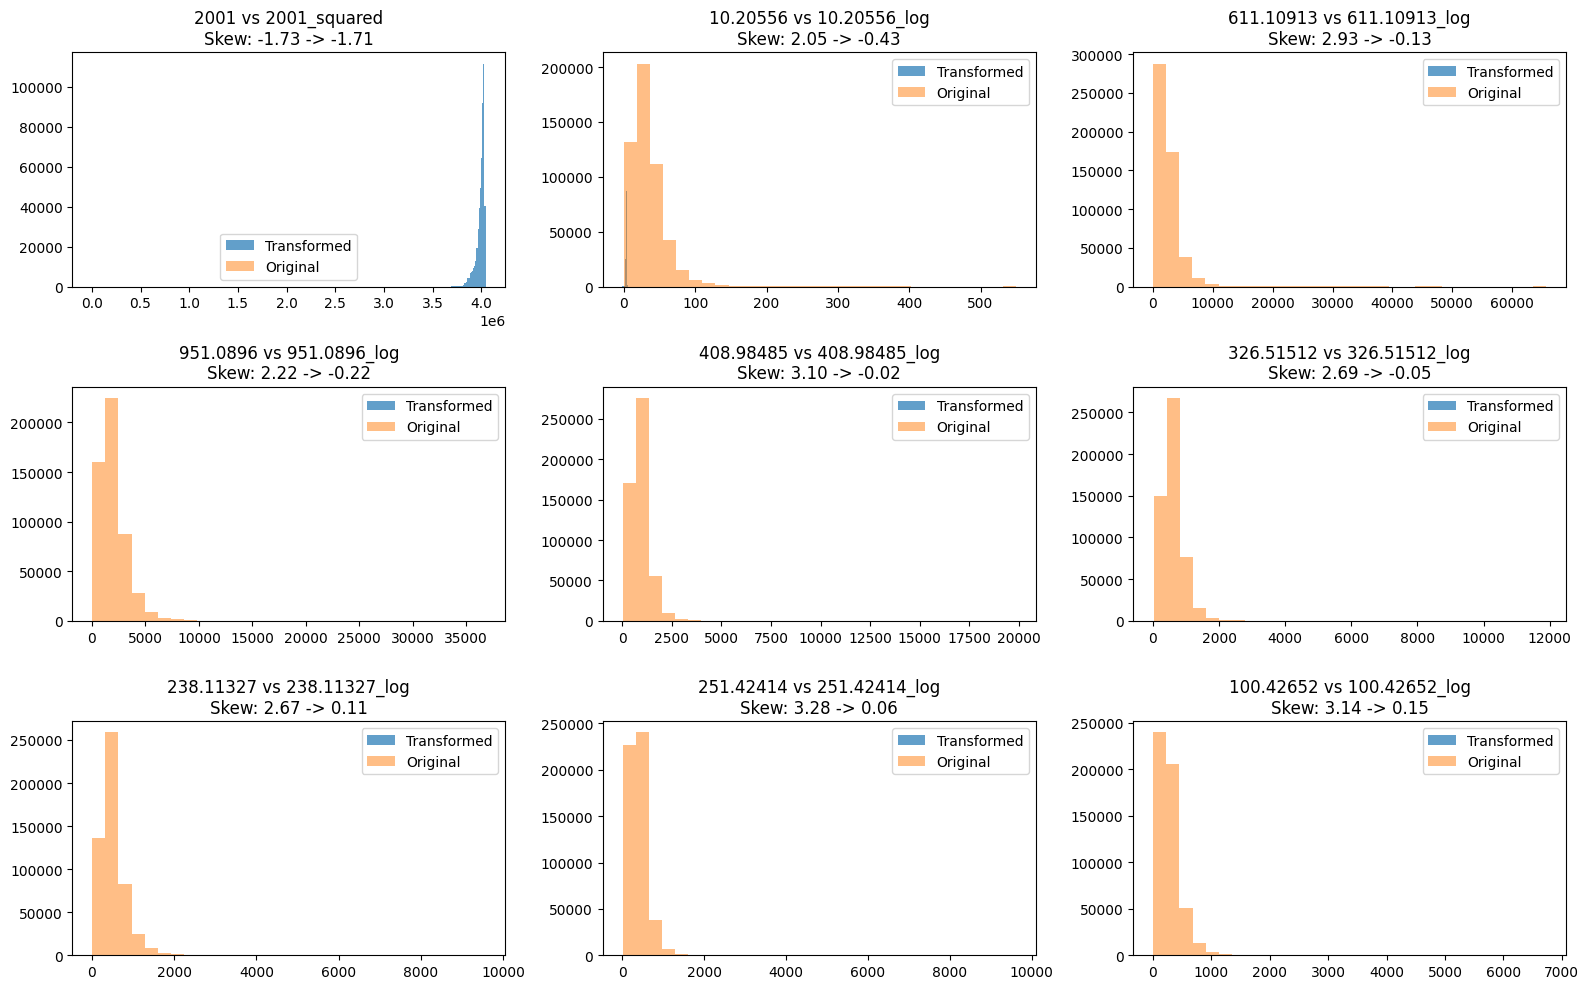

Keeping original version of 2001 (transformation didn't significantly reduce skewness)
Keeping transformed version of 10.20556 (skew: 2.05 -> -0.43)
Keeping transformed version of 611.10913 (skew: 2.93 -> -0.13)
Keeping transformed version of 951.0896 (skew: 2.22 -> -0.22)
Keeping transformed version of 408.98485 (skew: 3.10 -> -0.02)
Keeping transformed version of 326.51512 (skew: 2.69 -> -0.05)
Keeping transformed version of 238.11327 (skew: 2.67 -> 0.11)
Keeping transformed version of 251.42414 (skew: 3.28 -> 0.06)
Keeping transformed version of 100.42652 (skew: 3.14 -> 0.15)
Keeping transformed version of 179.19498 (skew: 4.17 -> 0.04)
Keeping original version of -317.87038 (transformation didn't significantly reduce skewness)
Keeping original version of -18.06215 (transformation didn't significantly reduce skewness)
Keeping original version of 11.7267 (transformation didn't significantly reduce skewness)
Keeping original version of 1.3679 (transformation didn't significantly reduc

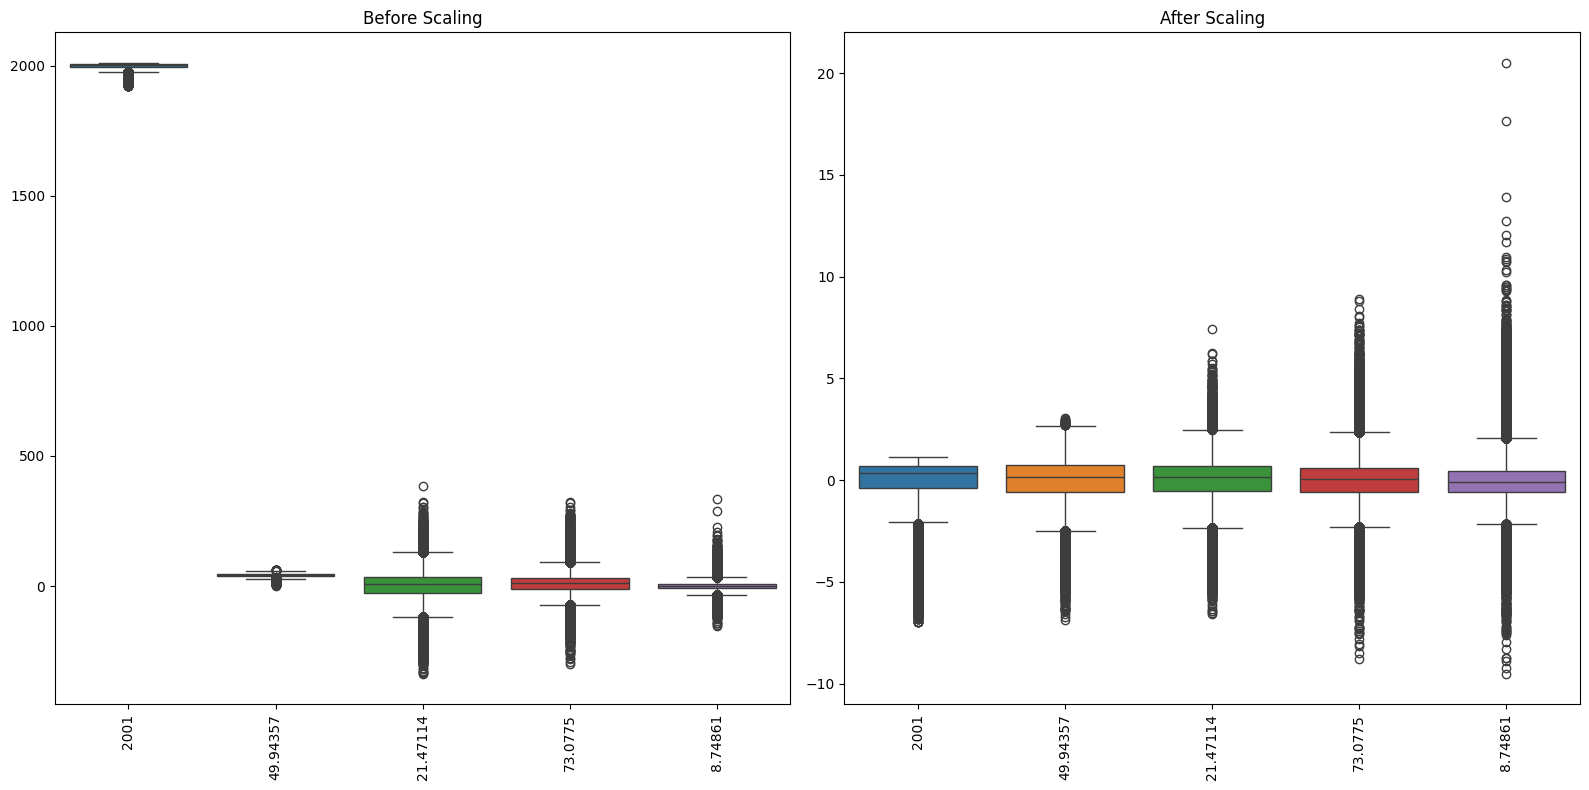

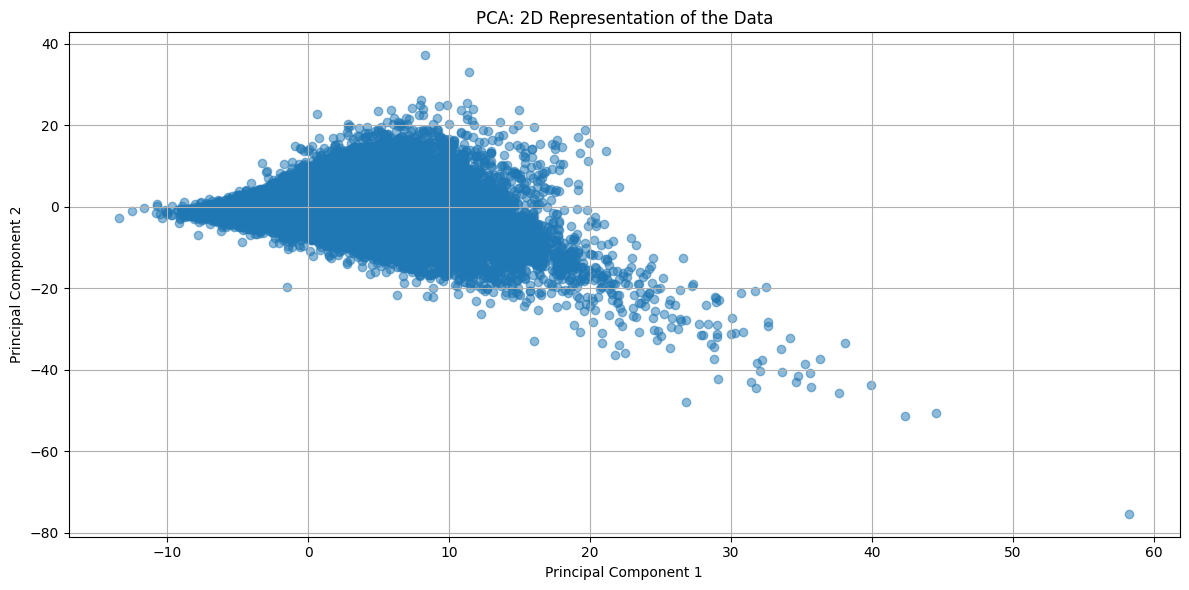


Feature Engineering Summary:
- Skewed features transformed: 45
- Scaling method: Standard Scaling
- Final dataset shape: (515344, 88)


In [11]:
# Feature Selection Mod

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assume df_selected and numeric_columns already exist

# --- 3. Feature Engineering ---

# Check the skewness of the features
skewness = df_selected[numeric_columns].apply(lambda x: stats.skew(x))
print("\nSkewness of numeric features:")
print(skewness.sort_values(ascending=False))

# Visualize the distribution of the most skewed features
plt.figure(figsize=(16, 10))
highly_skewed = skewness[abs(skewness) > 1].index.tolist()
if highly_skewed:
    for i, col in enumerate(highly_skewed[:min(9, len(highly_skewed))]):
        plt.subplot(3, 3, i+1)
        sns.histplot(df_selected[col], kde=True)
        plt.title(f'Distribution of {col} (Skew: {skewness[col]:.2f})')
    plt.tight_layout()
    plt.show()
else:
    print("No highly skewed features found.")

# Apply transformations to skewed features
def transform_skewed_features(df, skewness, threshold=1.0):
    df_transformed = df.copy()
    transformed_features = {}
    for col, skew_val in skewness.items():
        if abs(skew_val) > threshold:
            if skew_val > 0:
                if df[col].min() <= 0:
                    shift = abs(df[col].min()) + 1
                    df_transformed[f"{col}_log"] = np.log(df[col] + shift)
                    transformed_features[col] = f"{col}_log"
                else:
                    df_transformed[f"{col}_log"] = np.log(df[col])
                    transformed_features[col] = f"{col}_log"
            else:
                df_transformed[f"{col}_squared"] = df[col] ** 2
                transformed_features[col] = f"{col}_squared"
    return df_transformed, transformed_features

# Transform skewed features
df_transformed, transformed_features = transform_skewed_features(df_selected, skewness)
print("\nTransformed features:")
for original, transformed in transformed_features.items():
    print(f"- {original} -> {transformed}")

# Compare skewness before and after transformation
if transformed_features:
    transformed_cols = list(transformed_features.values())
    new_skewness = df_transformed[transformed_cols].apply(lambda x: stats.skew(x))

    plt.figure(figsize=(16, 10))
    for i, (orig, trans) in enumerate(transformed_features.items()):
        if i >= 9:
            break
        plt.subplot(3, 3, i+1)
        plt.hist(df_transformed[trans], bins=30, alpha=0.7, label='Transformed')
        plt.hist(df_selected[orig], bins=30, alpha=0.5, label='Original')
        plt.title(f'{orig} vs {trans}\nSkew: {skewness[orig]:.2f} -> {new_skewness[trans]:.2f}')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Keep best transformed versions
def select_best_transformation(df_original, df_transformed, original_skewness, transformed_features):
    df_selected = df_original.copy()
    transformed_cols = list(transformed_features.values())
    if transformed_cols:
        new_skewness = df_transformed[transformed_cols].apply(lambda x: stats.skew(x))
        for orig, trans in transformed_features.items():
            if abs(new_skewness[trans]) < abs(original_skewness[orig]) * 0.5:
                df_selected[orig] = df_transformed[trans]
                print(f"Keeping transformed version of {orig} (skew: {original_skewness[orig]:.2f} -> {new_skewness[trans]:.2f})")
            else:
                print(f"Keeping original version of {orig} (transformation didn't significantly reduce skewness)")
    return df_selected

df_selected = select_best_transformation(df_selected, df_transformed, skewness, transformed_features)

# Scale features
def scale_features(df, method='standard'):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    df_scaled = df.copy()
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'power':
        scaler = PowerTransformer(method='yeo-johnson')
    else:
        raise ValueError("Invalid scaling method.")
    df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])
    return df_scaled, scaler

df_scaled, scaler = scale_features(df_selected, method='standard')

# Visualize scaling
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_selected[numeric_columns[:5]])
plt.title('Before Scaling')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled[numeric_columns[:5]])
plt.title('After Scaling')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Reduce dimensions for visualization
def reduce_dimensions(df, method='pca', n_components=2):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42, perplexity=30, n_jobs=-1)
    else:
        raise ValueError("Invalid method.")
    reduced_data = reducer.fit_transform(df[numeric_features])
    return reduced_data, reducer

data_2d_pca, pca_model = reduce_dimensions(df_scaled, method='pca', n_components=2)
plt.figure(figsize=(12, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], alpha=0.5)
plt.title('PCA: 2D Representation of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
print("\nFeature Engineering Summary:")
print(f"- Skewed features transformed: {len(transformed_features)}")
print(f"- Scaling method: Standard Scaling")
print(f"- Final dataset shape: {df_scaled.shape}")


Clustering model

In [ ]:
# Clustering Models: KMeans, Agglomerative, DBSCAN, GaussianMixture, Spectral

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

# Your dataset should be defined as df_scaled before running this code
X = df_scaled.select_dtypes(include=['int64', 'float64'])

# Placeholder for storing cluster labels and models
cluster_results = {}

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
cluster_results['KMeans'] = {'labels': kmeans_labels, 'model': kmeans}

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X)
cluster_results['Agglomerative'] = {'labels': agg_labels, 'model': agg}

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
cluster_results['DBSCAN'] = {'labels': dbscan_labels, 'model': dbscan}

# Gaussian Mixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X)
cluster_results['GaussianMixture'] = {'labels': gmm_labels, 'model': gmm}

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)
cluster_results['Spectral'] = {'labels': spectral_labels, 'model': spectral}

# Evaluation function (reuse evaluate_clustering from previous cell)
results = []
for name, res in cluster_results.items():
    print(f"Evaluating {name}...")
    eval_metrics = evaluate_clustering(X, res['labels'], name)
    results.append(eval_metrics)

# Convert results to DataFrame
clustering_eval_df = pd.DataFrame(results)
print("\nClustering Evaluation Results:")
display(clustering_eval_df.sort_values(by='silhouette_score', ascending=False))


RAM TIDACK BISA MEMENUHI KAK
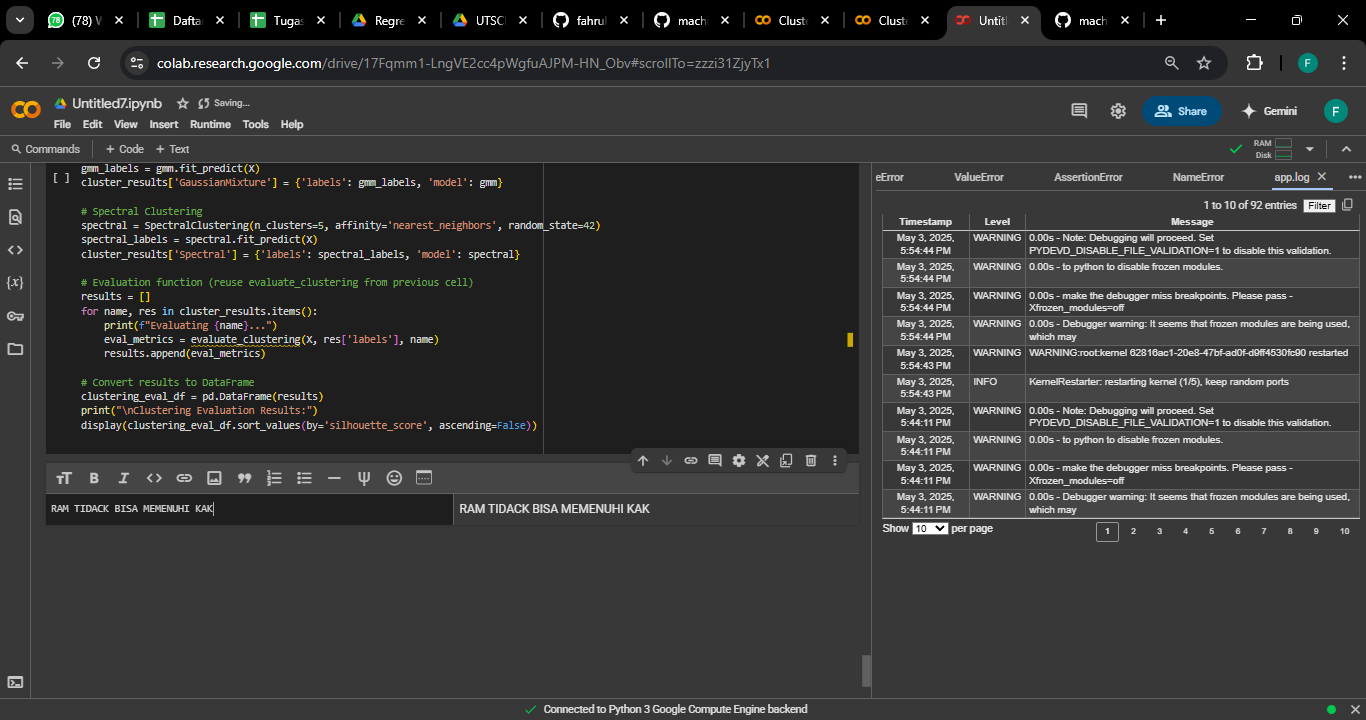

In [2]:
!pip install kneed
!pip install -q kneed scikit-learn


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import time

# Gunakan X yang sudah diskalakan
# Jika variabel kamu bernama df_scaled:
X = df_scaled.select_dtypes(include=['int64', 'float64'])

def plot_elbow_and_silhouette(X, max_k=10):
    inertia = []
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X)
        inertia.append(model.inertia_)
        try:
            score = silhouette_score(X, labels)
        except:
            score = np.nan
        silhouette_scores.append(score)

    # Elbow curve
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(K, inertia, 'bo-')
    kl = KneeLocator(K, inertia, curve='convex', direction='decreasing')
    optimal_k_elbow = kl.elbow
    if optimal_k_elbow:
        plt.axvline(optimal_k_elbow, linestyle='--', color='red', label=f'Elbow at k={optimal_k_elbow}')
        plt.legend()
    plt.title("Elbow Method (Inertia)")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")

    # Silhouette score
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'go-')
    best_sil = K[np.argmax(silhouette_scores)]
    plt.axvline(best_sil, linestyle='--', color='red', label=f'Best Silhouette k={best_sil}')
    plt.title("Silhouette Score")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return optimal_k_elbow or best_sil

optimal_k = plot_elbow_and_silhouette(X)
print(f"Jumlah cluster optimal: {optimal_k}")


NameError: name 'df_scaled' is not defined

In [5]:


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# ... (previous code remains the same)

def plot_agglomerative_clustering(X, max_k=10):
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(X)
        try:
            score = silhouette_score(X, labels)
        except ValueError:  # Handle cases where a cluster has only one sample
            score = np.nan
        silhouette_scores.append(score)

    plt.figure(figsize=(7, 5))
    plt.plot(K, silhouette_scores, 'go-')
    best_sil = K[np.nanargmax(silhouette_scores)]  # Use nanargmax to handle NaN values
    plt.axvline(best_sil, linestyle='--', color='red', label=f'Best Silhouette k={best_sil}')
    plt.title("Silhouette Score for Agglomerative Clustering")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.legend()
    plt.show()
    return best_sil

optimal_k_agglomerative = plot_agglomerative_clustering(X)
print(f"Optimal number of clusters (Agglomerative Clustering): {optimal_k_agglomerative}")

# Perform Agglomerative Clustering with the optimal k
agglomerative_model = AgglomerativeClustering(n_clusters=optimal_k_agglomerative)
agglomerative_labels = agglomerative_model.fit_predict(X)

# Now you can use agglomerative_labels for further analysis or visualization
# Example:
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglomerative_labels)
# plt.show()


NameError: name 'X' is not defined

In [ ]:


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming X is your scaled data (as defined in the previous code)

def plot_dbscan_clustering(X, eps_values, min_samples_values):
    best_eps = None
    best_min_samples = None
    best_score = -1

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Handle cases with only noise (-1 labels)
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters_ > 1: # Silhouette score is not defined for less than two clusters
                try:
                    score = silhouette_score(X, labels)
                    if score > best_score:
                        best_score = score
                        best_eps = eps
                        best_min_samples = min_samples
                except ValueError:  # Handle cases where a cluster has only one sample
                    pass
    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette score: {best_score}")

    return best_eps, best_min_samples


# Example usage (adjust eps and min_samples ranges as needed)
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)

best_eps, best_min_samples = plot_dbscan_clustering(X, eps_range, min_samples_range)

# Perform DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X)


# Now you can use dbscan_labels for further analysis or visualization
# Example:
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels)
# plt.show()


In [ ]:


from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def plot_gmm_clustering(X, max_k=10):
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(X)
        try:
            score = silhouette_score(X, labels)
            silhouette_scores.append(score)
        except ValueError:
            silhouette_scores.append(np.nan)

    plt.figure(figsize=(7, 5))
    plt.plot(K, silhouette_scores, 'go-')
    best_sil = K[np.nanargmax(silhouette_scores)]  # Use nanargmax to handle NaN values
    plt.axvline(best_sil, linestyle='--', color='red', label=f'Best Silhouette k={best_sil}')
    plt.title("Silhouette Score for Gaussian Mixture Model")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.legend()
    plt.show()
    return best_sil

optimal_k_gmm = plot_gmm_clustering(X)
print(f"Optimal number of clusters (GMM): {optimal_k_gmm}")

# Perform Gaussian Mixture Model clustering with the optimal k
gmm_model = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
gmm_labels = gmm_model.fit_predict(X)

# Now you can use gmm_labels for further analysis or visualization
# Example:
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=gmm_labels)
# plt.show()


In [6]:


from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

def plot_spectral_clustering(X, max_k=10):
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        spectral = SpectralClustering(n_clusters=k, assign_labels='kmeans', random_state=42)
        labels = spectral.fit_predict(X)
        try:
            score = silhouette_score(X, labels)
            silhouette_scores.append(score)
        except ValueError:
            silhouette_scores.append(np.nan)

    plt.figure(figsize=(7, 5))
    plt.plot(K, silhouette_scores, 'go-')
    best_sil = K[np.nanargmax(silhouette_scores)]
    plt.axvline(best_sil, linestyle='--', color='red', label=f'Best Silhouette k={best_sil}')
    plt.title("Silhouette Score for Spectral Clustering")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.legend()
    plt.show()
    return best_sil

optimal_k_spectral = plot_spectral_clustering(X)
print(f"Optimal number of clusters (Spectral Clustering): {optimal_k_spectral}")

# Perform Spectral Clustering with the optimal k
spectral_model = SpectralClustering(n_clusters=optimal_k_spectral, assign_labels='kmeans', random_state=42)
spectral_labels = spectral_model.fit_predict(X)

# Now you can use spectral_labels for further analysis or visualization
# Example:
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=spectral_labels)
# plt.show()


NameError: name 'X' is not defined

In [ ]:


from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from kneed import KneeLocator

# ... (previous code remains the same)


# Assuming X is your scaled data

# KMeans clustering with optimal k (already defined in previous code)
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X)

# Visualize KMeans Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50) # Adjust column indices if necessary
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")  # Replace with your actual feature names
plt.ylabel("Feature 2")
plt.show()

# ... (rest of the clustering code and visualization remains the same, adjusting plot titles and axis labels as needed)



# Penjelasan Matematika dan Justifikasi Model

## Formula Metrik Evaluasi

### 1. Silhouette Score

Silhouette score mengevaluasi seberapa baik setiap titik data ditempatkan dalam cluster-nya dibandingkan dengan cluster terdekat lainnya.

Untuk setiap titik data $i$, Silhouette coefficient $s(i)$ dihitung sebagai:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

dimana:
- $a(i)$ adalah jarak rata-rata dari titik $i$ ke semua titik lain dalam cluster yang sama
- $b(i)$ adalah jarak rata-rata minimum dari titik $i$ ke semua titik di cluster lain terdekat

Silhouette Score adalah rata-rata dari semua koefisien silhouette:

$$
\text{Silhouette} = \frac{1}{N}\sum_{i=1}^N s(i)
$$

Nilai berkisar antara -1 hingga 1, di mana:
- Nilai mendekati 1 menunjukkan bahwa sampel jauh dari cluster tetangga
- Nilai mendekati 0 menunjukkan sampel dekat dengan batas antar cluster
- Nilai negatif menunjukkan sampel mungkin ditempatkan di cluster yang salah

### 2. Davies-Bouldin Index

Davies-Bouldin Index mengevaluasi rasio antara jarak intra-cluster dan inter-cluster.

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$


dimana:
- $k$ adalah jumlah cluster
- $\sigma_i$ adalah jarak rata-rata dari setiap titik dalam cluster $i$ ke centroid cluster-nya
- $d(c_i, c_j)$ adalah jarak antara centroid cluster $i$ dan $j$

Nilai yang lebih rendah menunjukkan cluster yang lebih terpisah dengan baik.

### 3. Calinski-Harabasz Index

Calinski-Harabasz Index, juga dikenal sebagai Variance Ratio Criterion, mengukur rasio antara dispersi antar-cluster dan dispersi intra-cluster.

$$
CH = \frac{\text{tr}(B_k) / (k-1)}{\text{tr}(W_k) / (n-k)}
$$

dimana:
- $n$ adalah jumlah titik data
- $k$ adalah jumlah cluster
- $B_k$ adalah matriks dispersi antar-cluster
- $W_k$ adalah matriks dispersi intra-cluster
- $\text{tr}()$ adalah trace matriks

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah dengan baik.

## Penjelasan Algoritma Clustering

### 1. K-Means
K-Means adalah algoritma clustering partisional yang bertujuan untuk meminimalkan inersia (jumlah kuadrat jarak titik data ke centroid terdekat):

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

dimana $\mu_i$ adalah centroid cluster $C_i$.

Algoritma bekerja dengan:
1. Inisialisasi $k$ centroid secara acak
2. Mengalokasikan setiap titik data ke centroid terdekat
3. Menghitung ulang centroid sebagai rata-rata dari titik dalam cluster
4. Mengulangi langkah 2-3 hingga konvergen

### 2. Agglomerative Clustering
Agglomerative Clustering adalah metode hierarchical clustering dengan pendekatan bottom-up:

1. Dimulai dengan setiap titik data sebagai cluster individual
2. Pada setiap iterasi, menggabungkan dua cluster terdekat berdasarkan kriteria linkage
3. Proses berlanjut hingga semua titik digabungkan menjadi satu cluster

Kriteria linkage umum termasuk:
- Single linkage: $d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y)$
- Complete linkage: $d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y)$
- Average linkage: $d(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)$
- Ward linkage: Meminimalkan varians dalam cluster yang digabungkan

### 3. DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) mengelompokkan titik berdasarkan kepadatan:

1. Titik inti: Titik dengan minimal `min_samples` tetangga dalam radius `eps`
2. Titik terhubung-langsung: Titik dalam radius `eps` dari titik inti
3. Titik terhubung-kepadatan: Titik yang dapat dicapai melalui rantai titik terhubung-langsung
4. Noise: Titik yang bukan inti dan tidak terhubung-kepadatan ke titik inti lain

DBSCAN tidak memerlukan jumlah cluster yang ditentukan sebelumnya dan dapat menemukan cluster dengan bentuk arbitrary.

### 4. Gaussian Mixture Model
GMM memodelkan data sebagai campuran distribusi Gaussian:

$$
p(x) = \sum_{i=1}^{k} \pi_i \mathcal{N}(x | \mu_i, \Sigma_i)
$$

dimana:
- $\pi_i$ adalah bobot campuran (mixing weight) untuk komponen ke-$i$
- $\mu_i$ dan $\Sigma_i$ adalah mean dan covariance dari distribusi Gaussian ke-$i$

Parameter diestimasi menggunakan algoritma Expectation-Maximization (EM):
1. E-step: Menghitung probabilitas posterior setiap titik data terhadap setiap komponen
2. M-step: Memperbarui parameter model berdasarkan probabilitas yang dihitung

### 5. Spectral Clustering
Spectral Clustering menggunakan eigenvalue dari matriks similaritas untuk mereduksi dimensi:

1. Membangun matriks similaritas/adjacency $W$ antar titik data
2. Menghitung normalized Laplacian matrix $L = I - D^{-1/2}WD^{-1/2}$ di mana $D$ adalah matriks diagonal dengan $D_{ii} = \sum_j W_{ij}$
3. Menghitung eigenvector $k$ terendah dari $L$ (kecuali eigenvector dengan eigenvalue 0)
4. Melakukan K-Means pada eigenvector tersebut

Spectral Clustering efektif untuk menemukan cluster non-convex.